In [ ]:
#!pip install tensorflow --upgrade
#!pip install gast --upgrade
#!pip install astroid  --upgrade

In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
pip list

Package                            Version
---------------------------------- ---------------------
absl-py                            0.15.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.7
anaconda-project                   0.8.3
apache-beam                        2.38.0
asn1crypto                         1.0.1
astor                              0.8.1
astroid                            2.11.5
astropy                            3.2.1
astunparse                         1.6.3
atomicwrites                       1.3.0
attrs                              19.2.0
Automat                            20.2.0
avro-python3                       1.10.2
Babel                              2.7.0
backcall                           0.1.0
backports.functools-lru-cache      1.6.1
backports.os                       0.1.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                 

# 各パス指定

In [64]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
online_data= 'model/keypoint_classifier/online.csv'

# 分類数設定

In [3]:
NUM_CLASSES = 3

In [62]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32')
print(len(X_dataset))
print(X_dataset.shape)

634
(634, 43)


# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [85]:
# Labels of trained model classifier
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

# new labels of online classifier give new number to  each new gesture
y_dataset_online = np.loadtxt(online_data, delimiter=',', dtype='int32', usecols=(0)) 
# print(len(y_dataset))
# print(y_dataset.shape)
# print(type(y_dataset))

a=np.unique(y_dataset) # sorting the lables values of trained classifier
b=np.unique(y_dataset_online) # sorting the lables values of of new online classifier
#print(type(a))
print(a)
#print(type(b))
print(b)
c = np.isin(b,a) #  comparing/finding whether online classifier lables are already present in trained classiifer
print(c)
#if all values are False start on line training  and if any value is true means label class already in taine classifeir so break
for i in range (len(c)):
    if c[i] == True:
        print('current online class label already present in pretrained classifier')
        break
        
    else:
        print('start on line classifier training for this class')
        

         

# print(np.intersect1d(b, a))


[ 0  1  2 10]
[ 3  4  5 10]
[False False False  True]
start on line classifier training for this class
start on line classifier training for this class
start on line classifier training for this class
current online class label already present in pretrained classifier


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
4/4 [==============================] - 1s 316ms/step - loss: 1.1284 - accuracy: 0.2624 - val_loss: 1.0956 - val_accuracy: 0.2264

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0969 - accuracy: 0.3411 - val_loss: 1.0837 - val_accuracy: 0.4465

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0895 - accuracy: 0.3975 - val_loss: 1.0692 - val_accuracy: 0.5220

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0745 - accuracy: 0.4105 - val_loss: 1.0532 - val_accuracy: 0.6792

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 1.0515 - accuracy: 0.5010 - val_loss: 

4/4 [==============================] - 0s 14ms/step - loss: 0.7613 - accuracy: 0.6389 - val_loss: 0.5283 - val_accuracy: 0.8553

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.7210 - accuracy: 0.6764 - val_loss: 0.5188 - val_accuracy: 0.8616

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.7299 - accuracy: 0.6645 - val_loss: 0.5092 - val_accuracy: 0.8616

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7202 - accuracy: 0.6447 - val_loss: 0.4981 - val_accuracy: 0.8616

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.6790 - accuracy: 0.6978 - val_loss: 0.4863 - v

4/4 [==============================] - 0s 16ms/step - loss: 0.5288 - accuracy: 0.7792 - val_loss: 0.2268 - val_accuracy: 1.0000

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.5025 - accuracy: 0.8150 - val_loss: 0.2218 - val_accuracy: 1.0000

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.4566 - accuracy: 0.8172 - val_loss: 0.2158 - val_accuracy: 1.0000

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4795 - accuracy: 0.8372 - val_loss: 0.2098 - val_accuracy: 1.0000

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.4712 - accuracy: 0.8245 - val_loss: 0.2047 - v

Epoch 112/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.4184 - accuracy: 0.8236 - val_loss: 0.1277 - val_accuracy: 1.0000

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.3881 - accuracy: 0.8611 - val_loss: 0.1275 - val_accuracy: 1.0000

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.3885 - accuracy: 0.8474 - val_loss: 0.1266 - val_accuracy: 1.0000

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.3632 - accuracy: 0.8467 - val_loss: 0.1236 - val_accuracy: 1.0000

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.3840 - accuracy: 0.8635 - v


Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3108 - accuracy: 0.8782 - val_loss: 0.0727 - val_accuracy: 1.0000

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.3235 - accuracy: 0.8791 - val_loss: 0.0715 - val_accuracy: 1.0000

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.3006 - accuracy: 0.9046 - val_loss: 0.0707 - val_accuracy: 1.0000

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2883 - accuracy: 0.8988 - val_loss: 0.0696 - val_accuracy: 1.0000

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
4/4 [===

4/4 [==============================] - 0s 14ms/step - loss: 0.1971 - accuracy: 0.9409 - val_loss: 0.0393 - val_accuracy: 1.0000

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2011 - accuracy: 0.9236 - val_loss: 0.0389 - val_accuracy: 1.0000

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.2629 - accuracy: 0.9307 - val_loss: 0.0376 - val_accuracy: 1.0000

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2252 - accuracy: 0.9254 - val_loss: 0.0365 - val_accuracy: 1.0000

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.2218 - accuracy: 0.9255 - val_loss: 0.0352

4/4 [==============================] - 0s 16ms/step - loss: 0.1589 - accuracy: 0.9467 - val_loss: 0.0275 - val_accuracy: 1.0000

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2040 - accuracy: 0.9507 - val_loss: 0.0274 - val_accuracy: 1.0000

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2005 - accuracy: 0.9192 - val_loss: 0.0269 - val_accuracy: 1.0000

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1644 - accuracy: 0.9496 - val_loss: 0.0257 - val_accuracy: 1.0000

Epoch 00262: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 263/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1598 - accuracy: 0.9445 - val_loss: 0.0249

4/4 [==============================] - 0s 35ms/step - loss: 0.1467 - accuracy: 0.9601 - val_loss: 0.0218 - val_accuracy: 1.0000

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.1690 - accuracy: 0.9305 - val_loss: 0.0219 - val_accuracy: 1.0000

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1322 - accuracy: 0.9637 - val_loss: 0.0210 - val_accuracy: 1.0000

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1432 - accuracy: 0.9481 - val_loss: 0.0204 - val_accuracy: 1.0000

Epoch 00299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 300/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1409 - accuracy: 0.9615 - val_loss: 0.0200

4/4 [==============================] - 0s 15ms/step - loss: 0.1256 - accuracy: 0.9591 - val_loss: 0.0187 - val_accuracy: 1.0000

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1567 - accuracy: 0.9630 - val_loss: 0.0186 - val_accuracy: 1.0000

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1577 - accuracy: 0.9518 - val_loss: 0.0187 - val_accuracy: 1.0000

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1427 - accuracy: 0.9470 - val_loss: 0.0185 - val_accuracy: 1.0000

Epoch 00336: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 337/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.1290 - accuracy: 0.9625 - val_loss: 0.0183

4/4 [==============================] - 0s 16ms/step - loss: 0.1393 - accuracy: 0.9617 - val_loss: 0.0162 - val_accuracy: 1.0000

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1250 - accuracy: 0.9674 - val_loss: 0.0166 - val_accuracy: 1.0000

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1094 - accuracy: 0.9583 - val_loss: 0.0165 - val_accuracy: 1.0000

Epoch 00372: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 00372: early stopping


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 999us/step - loss: 0.0165 - accuracy: 1.0000


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[2.8506454e-04 7.9499641e-03 9.9176496e-01]
2


# 混同行列

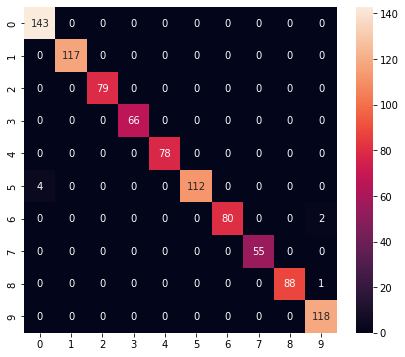

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       143
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        66
           4       1.00      1.00      1.00        78
           5       1.00      0.97      0.98       116
           6       1.00      0.98      0.99        82
           7       1.00      1.00      1.00        55
           8       1.00      0.99      0.99        89
           9       0.98      1.00      0.99       118

    accuracy                           0.99       943
   macro avg       0.99      0.99      0.99       943
weighted avg       0.99      0.99      0.99       943



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [15]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [16]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp7yua93fu\assets


6320

# 推論テスト

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [18]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [19]:
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 42]
Input Type: <class 'numpy.float32'>
Output Shape: [1 3]
Output Type: <class 'numpy.float32'>


In [20]:
print(np.array([X_test[0]]).shape)

(1, 42)


In [21]:
print("Input details:", input_details)
print("Input details index:", input_details[0]['index'])

Input details: [{'name': 'input_1', 'index': 0, 'shape': array([ 1, 42]), 'shape_signature': array([-1, 42]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Input details index: 0


In [22]:
print("Output details:", output_details)
print("Output details index:", output_details[0]['index'])

Output details: [{'name': 'Identity', 'index': 10, 'shape': array([1, 3]), 'shape_signature': array([-1,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details index: 10


In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [25]:
print(tflite_results)

[[2.8506454e-04 7.9499595e-03 9.9176496e-01]]


In [26]:
print(np.squeeze(tflite_results))
gg =np.argmax(np.squeeze(tflite_results))
print(gg)

[2.8506454e-04 7.9499595e-03 9.9176496e-01]
2


In [27]:
tensor_details = interpreter.get_tensor_details()
for dict in tensor_details:
    i = dict['index']
    tensor_name = dict['name']
    scales = dict['quantization_parameters']['scales']
    zero_points = dict['quantization_parameters']['zero_points']
    tensor = interpreter.tensor(i)()

    print(i, type, tensor_name, scales.shape, zero_points.shape, tensor.shape)

0 <class 'type'> input_1 (0,) (0,) (1, 42)
1 <class 'type'> sequential/dense/BiasAdd/ReadVariableOp/resource (0,) (0,) (20,)
2 <class 'type'> sequential/dense_1/BiasAdd/ReadVariableOp/resource (0,) (0,) (10,)
3 <class 'type'> sequential/dense_2/BiasAdd/ReadVariableOp/resource (0,) (0,) (3,)
4 <class 'type'> sequential/dense/MatMul (0,) (0,) (20, 42)
5 <class 'type'> sequential/dense_1/MatMul (0,) (0,) (10, 20)
6 <class 'type'> sequential/dense_2/MatMul (0,) (0,) (3, 10)
7 <class 'type'> sequential/dense/MatMul;sequential/dense/Relu;sequential/dense/BiasAdd (0,) (0,) (1, 20)
8 <class 'type'> sequential/dense_1/MatMul;sequential/dense_1/Relu;sequential/dense_1/BiasAdd (0,) (0,) (1, 10)
9 <class 'type'> sequential/dense_2/MatMul;sequential/dense_2/BiasAdd (0,) (0,) (1, 3)
10 <class 'type'> Identity (0,) (0,) (1, 3)


In [28]:
print(y_test[0])

2


In [29]:
with open('model/keypoint_classifier/keypoint_classifier_label.csv',
            encoding='utf-8-sig') as f:
    
    keypoint_classifier_labels = csv.reader(f)
    keypoint_classifier_labels = [
        row[0] for row in keypoint_classifier_labels
    ]
    print(keypoint_classifier_labels)
    
aa =keypoint_classifier_labels[gg]
print(aa)


['Hello', 'One', 'Two']
Two
